# IMPORTING MODULES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
from matplotlib.pylab import rcParams
from pylab import rcParams

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

In [4]:
dff=pd.read_csv('AAPL (2).csv')
print(dff)
df=dff[['Date','Open']]


            Date        Open        High         Low       Close   Adj Close  \
0     1990-01-02    0.314732    0.334821    0.312500    0.332589    0.267212   
1     1990-01-03    0.339286    0.339286    0.334821    0.334821    0.269005   
2     1990-01-04    0.341518    0.345982    0.332589    0.335938    0.269903   
3     1990-01-05    0.337054    0.341518    0.330357    0.337054    0.270799   
4     1990-01-08    0.334821    0.339286    0.330357    0.339286    0.272592   
...          ...         ...         ...         ...         ...         ...   
7937  2021-07-02  137.899994  140.000000  137.750000  139.960007  139.960007   
7938  2021-07-06  140.070007  143.149994  140.070007  142.020004  142.020004   
7939  2021-07-07  143.539993  144.889999  142.660004  144.570007  144.570007   
7940  2021-07-08  141.580002  144.059998  140.669998  143.240005  143.240005   
7941  2021-07-09  142.750000  145.649994  142.649994  145.110001  145.110001   

         Volume  
0     183198400  
1  

In [5]:
df.head()


,Date,Open
0,1990-01-02,0.314732
1,1990-01-03,0.339286
2,1990-01-04,0.341518
3,1990-01-05,0.337054
4,1990-01-08,0.334821


In [6]:

df.tail()

,Date,Open
7937,2021-07-02,137.899994
7938,2021-07-06,140.070007
7939,2021-07-07,143.539993
7940,2021-07-08,141.580002
7941,2021-07-09,142.750000


#changing the column names as month and sales

In [7]:
df.columns=["Date","count"]
df.head()
indexeddataset= df.set_index(['Date'])
indexeddataset

,count
Date,
1990-01-02,0.314732
1990-01-03,0.339286
1990-01-04,0.341518
1990-01-05,0.337054
1990-01-08,0.334821
...,...
2021-07-02,137.899994
2021-07-06,140.070007
2021-07-07,143.539993


#CONVERTING THE DATE TO DATETIME USING TO_dATETIME

In [11]:
indexeddataset= df.set_index(['Date'])

In [12]:
indexeddataset.head()


,count
Date,
1990-01-02,0.314732
1990-01-03,0.339286
1990-01-04,0.341518
1990-01-05,0.337054
1990-01-08,0.334821


# ANALYSING THE DATA AND CHECKING STATIONARY

In [13]:
###plotting the graph

<AxesSubplot:xlabel='Date'>

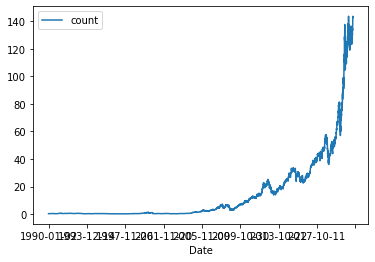

In [14]:

indexeddataset.plot()


# on obeserving the graph it looks like it has some trend and seasonality and to check stationarity of the graph we have to perform 2 tests

In [15]:
##Checking the stationarity on Rolling statistics

#what is rolling
rm = indexeddataset.rolling(window=12).mean()
rs = indexeddataset.rolling(window=12).std()
print(rm.head,rs.head)


<bound method NDFrame.head of                  count
Date                  
1990-01-02         NaN
1990-01-03         NaN
1990-01-04         NaN
1990-01-05         NaN
1990-01-08         NaN
...                ...
2021-07-02  133.625003
2021-07-06  134.480836
2021-07-07  135.550002
2021-07-08  136.490002
2021-07-09  137.375001

[7942 rows x 1 columns]> <bound method NDFrame.head of                count
Date                
1990-01-02       NaN
1990-01-03       NaN
1990-01-04       NaN
1990-01-05       NaN
1990-01-08       NaN
...              ...
2021-07-02  2.561558
2021-07-06  2.865078
2021-07-07  3.623499
2021-07-08  3.600788
2021-07-09  3.734383

[7942 rows x 1 columns]>


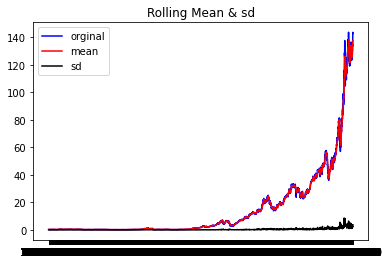

In [16]:
pt.plot(indexeddataset, color='blue', label='orginal')
pt.plot(rm, color='red', label='mean')
pt.plot(rs, color='black', label='sd')
pt.legend(loc='best')
pt.title('Rolling Mean & sd')
pt.show()

here both the mean and standerd deviation are varying so we cannot say this is stationary

In [17]:
##Checking the stationarity by 2nd method which is known as Dickey-fuller test

from statsmodels.tsa.stattools import adfuller #importing module adfuller form statsmodel

print('Results of the test: ') 
dftest= adfuller(indexeddataset['count'],autolag='AIC') #exact value and actual value adn analyses from the diffrence b/n them
dfoutput= pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations'])
#here how the dfoutput and dftest works?
for key,value in dftest[4].items():
    dfoutput['Critical Value(%s)' %key]=value
#understand the for loop?
print(dfoutput)

Results of the test: 
Test Statistic               4.967731
p-value                      1.000000
#Lags Used                  36.000000
Number of Observations    7905.000000
Critical Value(1%)          -3.431178
Critical Value(5%)          -2.861906
Critical Value(10%)         -2.566965
dtype: float64


Here the p-value should be lessthan or equal to 0.05 and the test-static value and critical value should almost equal-------but in this these 2fails so the given data is not stationary from this test

<AxesSubplot:xlabel='Date'>

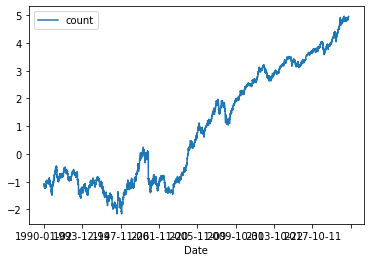

In [18]:
#estimate the trend
idl=np.log(indexeddataset)
idl.plot()

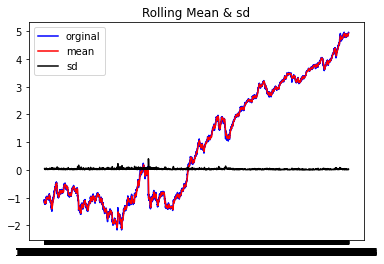

Results of the test: 
Test Statistic               0.482221
p-value                      0.984323
#Lags Used                  22.000000
Number of Observations    7919.000000
Critical Value(1%)          -3.431176
Critical Value(5%)          -2.861905
Critical Value(10%)         -2.566964
dtype: float64


In [21]:
test_stationarity(idl)

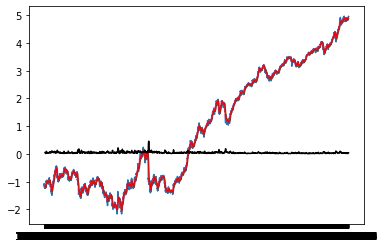

In [22]:
ma=idl.rolling(window=24).mean()
mstd=idl.rolling(window=24).std()
pt.plot(idl)
pt.plot(ma, color='red')
pt.plot(mstd, color='black')
#we have done the rolling statistics test in which the mean is varying so
#stationarity failed

 Now subtracting the moving avergae and loggdata we get residual data which is
 a stationary graph and once we get the residual data we test its stationarity.

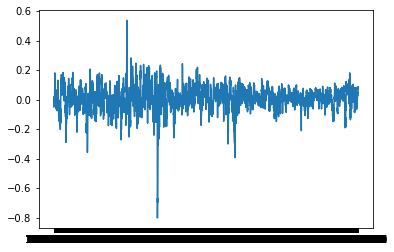

In [23]:
dl_ma=idl-ma
dl_ma.head(12)

#remove nan values
dl_ma.dropna(inplace=True)
dl_ma.head(12)
pt.plot(dl_ma)

In [24]:
#checking the stationarity on residual data by both the methods
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #ROLLING STATISTICS
    mv=timeseries.rolling(window=12).mean()
    mstd=timeseries.rolling(window=12).std()
    
    #plotting the above stats
    ori=pt.plot(timeseries, color='blue', label='orginal')
    mean=pt.plot(mv, color='red', label='mean')
    sd=pt.plot(mstd, color='black', label='sd')
    pt.legend(loc='best')##yy the parameter is best? find solution
    pt.title('Rolling Mean & sd')
    pt.show()
    
    #performing the dickyfuller test
    
    print('Results of the test: ') 
    dftest= adfuller(timeseries['count'],autolag='AIC') #exact value and actual value adn analyses from the diffrence b/n them
    dfoutput= pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations'])
    #here how the dfoutput and dftest works?
    for key,value in dftest[4].items():
        dfoutput['Critical Value(%s)' %key]=value
    #understand the for loop?
    print(dfoutput)

# NOW WE ARE GOING TO CHECK ON RESIDUAL DATA 

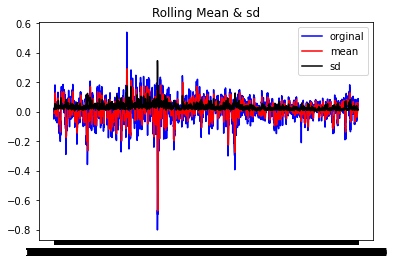

Results of the test: 
Test Statistic           -1.287245e+01
p-value                   4.846983e-24
#Lags Used                2.700000e+01
Number of Observations    7.891000e+03
Critical Value(1%)       -3.431179e+00
Critical Value(5%)       -2.861906e+00
Critical Value(10%)      -2.566965e+00
dtype: float64


In [25]:
test_stationarity(dl_ma)

Here we have the mean and sd better than before and also the reults of dick-fuller test is quite better than before but still the graph is not stationary

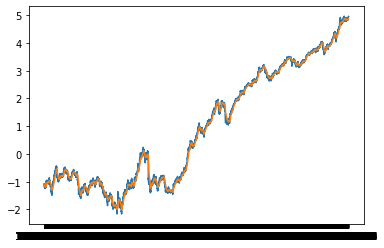

In [26]:
ewa=idl.ewm(halflife=12, min_periods=0, adjust=True).mean()
pt.plot(idl)
pt.plot(ewa)

WHY WEIGHTED AVERAGE--->BECAUSE WE NEED TO SEE THE TREND THAT IS PRESENT INSIDE 
                        TIME SERIES

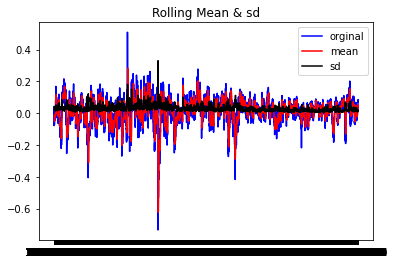

Results of the test: 
Test Statistic           -1.120929e+01
p-value                   2.145486e-20
#Lags Used                2.200000e+01
Number of Observations    7.919000e+03
Critical Value(1%)       -3.431176e+00
Critical Value(5%)       -2.861905e+00
Critical Value(10%)      -2.566964e+00
dtype: float64


In [27]:
idl_ewa=idl-ewa
test_stationarity(idl_ewa)

 FROM THIS WE CAN't COnCLUDE THE DATA IS STATIONARY HOW-->SICNCE THE SD GRAPH AND MEAN HAS NO TREND and still varies  AND THE P-VALUE IN THE ADFULLER TEST IS 0.05

In [28]:
#df['sales']=df['count']-df['count'].shift(1)
#df['seasonal First difference']=df['count']-df['count'].shift(30)
#df.head()
dslogdiffshift=idl-idl.shift()


here the lag is 1 and we shifted by 1, so that we can use in forecasting----y shifiting it by 1 and why should we shift...

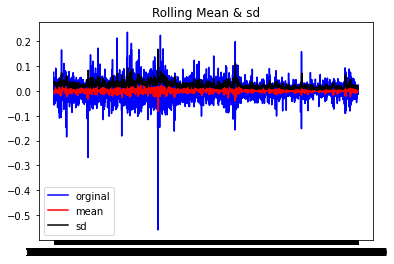

Results of the test: 
Test Statistic             -18.879229
p-value                      0.000000
#Lags Used                  21.000000
Number of Observations    7919.000000
Critical Value(1%)          -3.431176
Critical Value(5%)          -2.861905
Critical Value(10%)         -2.566964
dtype: float64


In [29]:
dslogdiffshift.dropna(inplace=True)
test_stationarity(dslogdiffshift)

HERE THE GRAPH OF MEAN AND SD IS CONSTANT AND THE NULL HYPOTHESIS TEST IS REJECTED..

WHY MOVING AVERAGE---- TO REMOVE THE TREND ON THE ABOVE EXPONENTIAL WEIGHTED AVERAGE..SO WE CONSIDER THE LAG BY 1 AND SUBTRATED IT BY ACTUAL LOGDATA. 

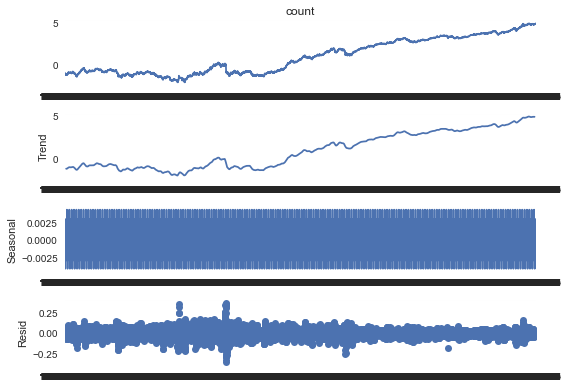

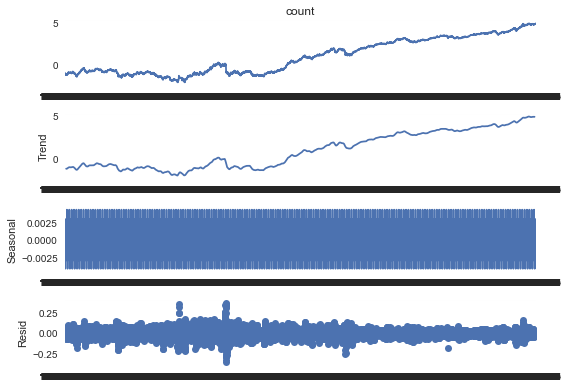

In [30]:
#COMPONENTS OF TIME SERIES

from statsmodels.tsa.seasonal import seasonal_decompose
pt.style.use('seaborn')
seasonal_decompose(idl['count'],period=40).plot()


residual is irregularities present in the data

ACCORDING TO RESIDUAL DATA ABOVE THE DATA IS NOT STATIONARY FROM ONE OF THE TEST. SO WE ARE TAKING MOVING AVERAGE FOR PREDICTION

# APPLYING ARIMA ALLGORITHM THAT IS FIDNING THE VALUE OF P AND Q WHICH IS AUTO REGRESIVE AND MOVING AVERAGE AND WE CALCULATED INTEGRATED VALUE THAT IS DIFF LAG IS 1 I.E D---1

IN ORDER TO CAL P AND Q WE NEED TO FIND ACF GRAPH ADN PACF GRAPH I.E AUTO CORELATION GRAPH ADN PARTIAL AUTO CO-RELATION GRAPH

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


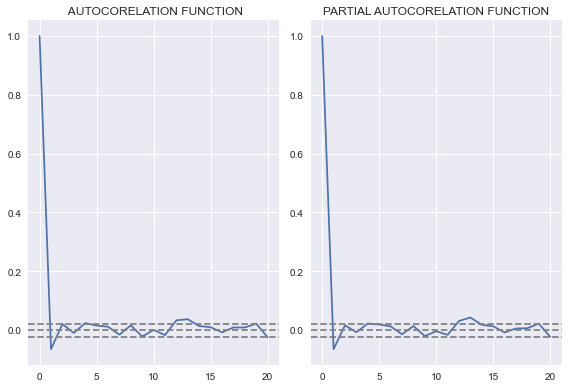

In [31]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf= acf(dslogdiffshift, nlags=20)
lag_pacf=pacf(dslogdiffshift, nlags=20, method='ols')#ORIDINARY LEAST SQUARE METHOD SO THAT 
#THE VALUE SHOULD ALWAYS BE LESS WHEN WE COMBINE THE AR AND MA.
#plot ACF:
pt.subplot(121)
pt.plot(lag_acf)
pt.axhline(y=0, linestyle='--', color='gray')
pt.axhline(y=-1.96/np.sqrt(len(dslogdiffshift)), linestyle='--', color='gray')
pt.axhline(y=1.96/np.sqrt(len(dslogdiffshift)), linestyle='--', color='gray')
pt.title(' AUTOCORELATION FUNCTION')
#plot PACF:
pt.subplot(122)
pt.plot(lag_pacf)
pt.axhline(y=0, linestyle='--', color='gray')
pt.axhline(y=-1.96/np.sqrt(len(dslogdiffshift)), linestyle='--', color='gray')
pt.axhline(y=1.96/np.sqrt(len(dslogdiffshift)), linestyle='--', color='gray')
pt.title('PARTIAL AUTOCORELATION FUNCTION')
pt.tight_layout()

HERE THE THE VALUE OF P IN ACF IS 2 AND Q VALUE IN PACF IS 2 HOW?--->THE ANSWER IS THE VALUE AT WHICH THE LINE CUTS AT 0 AND AT WHICH VALUE IT DEGRADES DOWN.

COMBINING THE AR AND MA we get RSS value which is a residual is the difference between an observed value and a predicted value in a regression model.

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequen

Text(0.5, 1.0, 'RMSE: 6.416350')

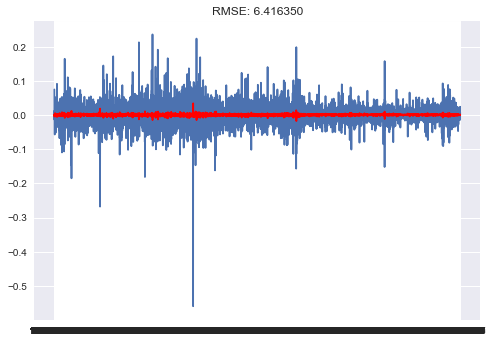

In [32]:
from statsmodels.tsa.arima_model import ARIMA
#combining the both the models
model=ARIMA(dslogdiffshift, order=(2,0,2))
results_ARIMA=model.fit(disp=-1)
pt.plot(dslogdiffshift)
pt.plot(results_ARIMA.fittedvalues, color='red')
pt.title('RMSE: %4f' % sum((results_ARIMA.fittedvalues-dslogdiffshift['count'])**2))

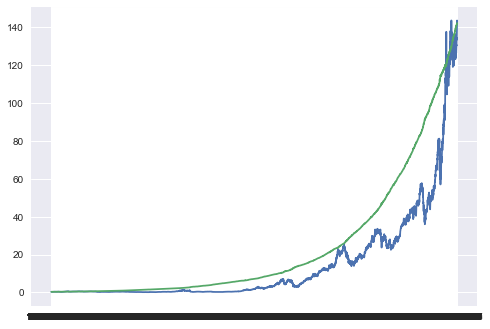

In [33]:
p_a_d=pd.Series(results_ARIMA.fittedvalues, copy=True)
p_a_d_cums=p_a_d.cumsum()
p_a_d_log=pd.Series(idl['count'].iloc[0], index=idl.index)
p_a_d_log=p_a_d_log.add(p_a_d_cums, fill_value=0)
p_a=np.exp(p_a_d_log)
pt.plot(indexeddataset)
pt.plot(p_a)

In [34]:
import statsmodels.api as sm

model=sm.tsa.statespace.SARIMAX(idl,order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()



C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


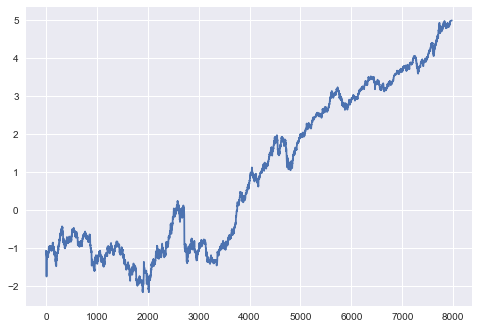

In [35]:
pt.plot(results.predict(1,7972))


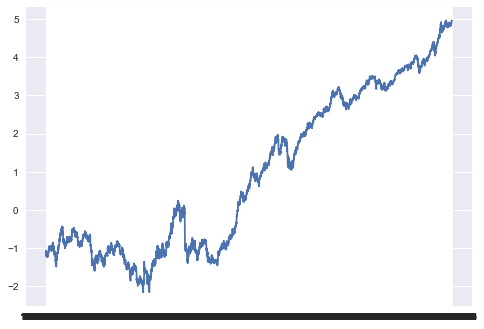

In [36]:
pt.plot(idl)

In [37]:
x=results.forecast(steps=30)
print("The cost of next days is", x)
print(type(x))
y=np.exp(x)
y

The cost of next days is 7942    4.960892
7943    4.963560
7944    4.962823
7945    4.962762
7946    4.963196
7947    4.964009
7948    4.965068
7949    4.966313
7950    4.966547
7951    4.968312
7952    4.970324
7953    4.972209
7954    4.972432
7955    4.974670
7956    4.974305
7957    4.974198
7958    4.974308
7959    4.974787
7960    4.975776
7961    4.976733
7962    4.976430
7963    4.977402
7964    4.979965
7965    4.981628
7966    4.981866
7967    4.984089
7968    4.983736
7969    4.983628
7970    4.983727
7971    4.984194
Name: predicted_mean, dtype: float64
<class 'pandas.core.series.Series'>


C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


7942    142.721055
7943    143.102343
7944    142.996942
7945    142.988118
7946    143.050295
7947    143.166573
7948    143.318261
7949    143.496849
7950    143.530445
7951    143.784024
7952    144.073627
7953    144.345442
7954    144.377638
7955    144.701131
7956    144.648212
7957    144.632846
7958    144.648748
7959    144.718003
7960    144.861251
7961    144.999865
7962    144.955971
7963    145.096862
7964    145.469218
7965    145.711350
7966    145.746021
7967    146.070384
7968    146.018859
7969    146.003119
7970    146.017515
7971    146.085721
Name: predicted_mean, dtype: float64

In [38]:
df_list=x.values.tolist()
y=df.values.tolist()
#type(y)



In [39]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import rmse

#print('Train Mean Absolute Error:', mean_absolute_error(idl, re[:8000]))

#print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))